In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv('datasets/Titanic/train.csv')
test_df = pd.read_csv('datasets/Titanic/test.csv')

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 细分数据
train_df.describe(percentiles=[.75, .8, .95])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
80%,713.000000,1.000000,3.000000,41.000000,1.000000,1.000000,39.687500
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 计算离散型变量的统计特征
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

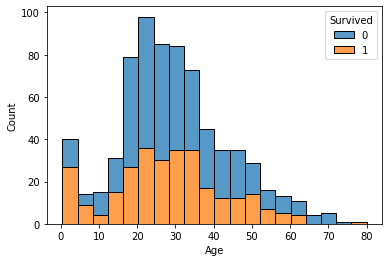

In [13]:
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack')

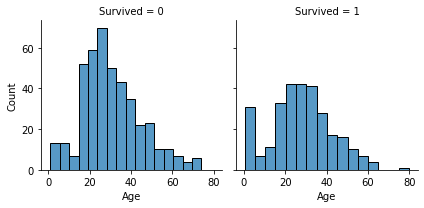

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(sns.histplot, 'Age')

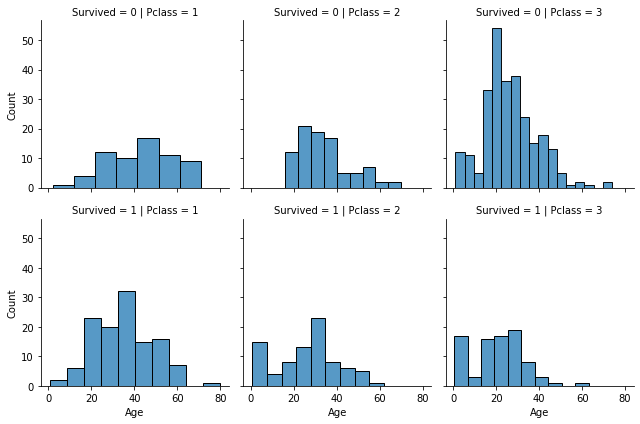

In [15]:
g2 = sns.FacetGrid(train_df, row='Survived', col='Pclass')
g2.map(sns.histplot, 'Age')

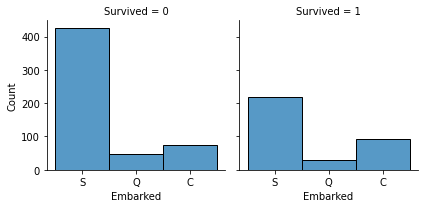

In [16]:
# Embarked是否与生还率有关
g3 = sns.FacetGrid(train_df, col='Survived')
g3.map(sns.histplot, 'Embarked')

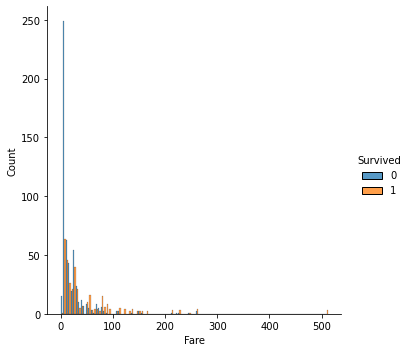

In [17]:
sns.displot(train_df, x="Fare", hue='Survived', multiple="dodge")

In [18]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

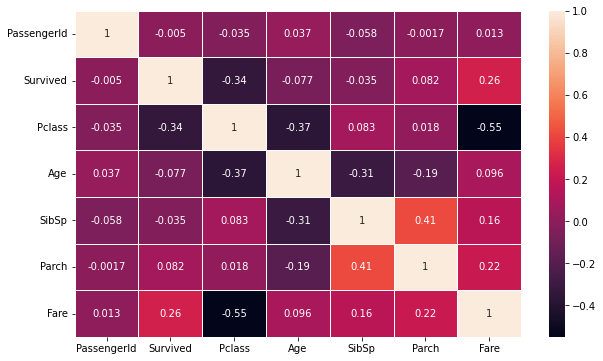

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, ax=ax)

## 清洗数据

In [21]:
data_clean = [train_df, test_df]

In [22]:
for datalist in data_clean:
    
    # 填充中位数
    datalist['Age'].fillna(datalist['Age'].median(), inplace = True)
    
    # 填充第一个众数
    datalist['Embarked'].fillna(datalist['Embarked'].mode()[0], inplace = True)
    datalist['Fare'].fillna(datalist['Fare'].median(), inplace = True)

    # 切分称呼
    datalist['Title'] = datalist['Name'].str.split(',', expand=True)[1].str.split('.', expand=True)[0]
    title_others = (datalist['Title'].value_counts() < 10) 
    datalist['Title'] = datalist['Title'].apply(lambda x: 'Others' if title_others.loc[x] == True else x)
    
    # 特征工程
    # 分箱处理：把连续值转换成离散值的过程
    datalist['AgeBin'] = pd.cut(datalist['Age'], 5)
    datalist['FareBin'] = pd.qcut(datalist['Fare'], 4)
    
    # 合并SibSp、Parch
    datalist['FamilySize'] = datalist['SibSp'] + datalist['Parch']
    # train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
    datalist['IsAlone'] = 0
    datalist.loc[datalist['FamilySize'] > 0, 'IsAlone'] = 1
    
    # 删除无关列
    drop_columns = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin']   
    # 不创建新的对象，直接对原始对象进行删除
    datalist.drop(drop_columns, axis=1, inplace = True)

In [23]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.303538
1,1,0.505650


### 特征编码

In [24]:
label = preprocessing.LabelEncoder()
for datalist in data_clean:
    # train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0}).astype(int)
    datalist['Sex'] = label.fit_transform(datalist['Sex'])
    datalist['Embarked'] = label.fit_transform(datalist['Embarked'])
    datalist['Title'] = label.fit_transform(datalist['Title'])
    datalist['FareBin'] = label.fit_transform(datalist['FareBin'])
    datalist['AgeBin'] = label.fit_transform(datalist['AgeBin'])

In [25]:
train_df.head()

,Survived,Pclass,Sex,Embarked,Title,AgeBin,FareBin,FamilySize,IsAlone
0,0,3,1,2,2,1,0,1,1
1,1,1,0,0,3,2,3,1,1
2,1,3,0,2,1,1,1,0,0
3,1,1,0,2,3,2,3,1,1
4,0,3,1,2,2,2,1,0,0


In [26]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Embarked      0
Title         0
AgeBin        0
FareBin       0
FamilySize    0
IsAlone       0
dtype: int64

In [27]:
test_df.head()

,Pclass,Sex,Embarked,Title,AgeBin,FareBin,FamilySize,IsAlone
0,3,1,1,2,2,0,0,0
1,3,0,2,3,3,0,1,1
2,2,1,1,2,4,1,0,0
3,3,1,2,2,1,1,0,0
4,3,0,2,3,1,1,2,1


In [28]:
test_df.isnull().sum()

Pclass        0
Sex           0
Embarked      0
Title         0
AgeBin        0
FareBin       0
FamilySize    0
IsAlone       0
dtype: int64

### 建模、预测

In [29]:
X_train = train_df.iloc[:, 1:]
y_train = train_df['Survived']
X_test = test_df

In [30]:
X_train.shape

(891, 8)

In [31]:
X_test.shape

(418, 8)

In [32]:
# 假设此文件为真实值
y_true = pd.read_csv("datasets/Titanic/gender_submission.csv")['Survived']

In [33]:
perceptron = Perceptron()
time_start = time.perf_counter()
perceptron.fit(X_train, y_train)
y_perceptron = perceptron.predict(X_test)
print("准确率：" + str(accuracy_score(y_true, y_perceptron)))
time_end = time.perf_counter()
print("耗时(秒):" + str(time_end - time_start))

准确率：0.5980861244019139
耗时(秒):0.0053336000000001604


In [34]:
linreg = LinearRegression()
time_start = time.perf_counter()
linreg.fit(X_train, y_train)
y_linreg = linreg.predict(X_test)
y_linreg[y_linreg > 0.5] = 1
y_linreg[y_linreg <= 0.5] = 0
print("准确率：" + str(accuracy_score(y_true, y_linreg)))
time_end = time.perf_counter()
print("耗时(秒):" + str(time_end - time_start))

准确率：0.9641148325358851
耗时(秒):0.003962800000000044


In [35]:
logreg = LogisticRegression()
time_start = time.perf_counter()
logreg.fit(X_train, y_train)
y_logreg = logreg.predict(X_test)
print("准确率：" + str(accuracy_score(y_true, y_logreg)))
time_end = time.perf_counter()
print("耗时(秒):" + str(time_end - time_start))

准确率：0.9138755980861244
耗时(秒):0.009510899999999545


In [ ]:
logreg2 = LogisticRegression()
time_start = time.perf_counter()
penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8, 1.0]
max_iter = [100, 500, 1000, 2000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']
param_grid = dict(penalty=penalty, C=C, max_iter = max_iter, class_weight=class_weight, solver=solver)
logreg2_cv = GridSearchCV(estimator=logreg2, param_grid=param_grid, scoring='accuracy', verbose=0, n_jobs=-1, cv=10)
logreg2_cv.fit(X_train, y_train)
best_params = logreg2_cv.best_params_
print(f"best params: {best_params}")
logreg2 = LogisticRegression(**best_params)
logreg2.fit(X_train, y_train)
y_logreg2 = logreg2.predict(X_test)
print("准确率：" + str(accuracy_score(y_true, y_logreg2)))
time_end = time.perf_counter()
print("耗时(秒):" + str(time_end - time_start))

best params: {'C': 1.0, 'class_weight': {1: 0.4, 0: 0.6}, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
准确率：0.9354066985645934
耗时(秒):8.0772036


In [55]:
time_start = time.perf_counter()

rf = RandomForestClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 250, 500, 750],
    'max_depth': [6, 8, 10, 12],
    'max_features': ['auto', 'sqrt', 'log2'],
    # 'min_samples_split': range(1, 10, 2),
    # 'min_samples_leaf': range(1, 10, 2),
    'oob_score': [True, False],
}

rf_cv = GridSearchCV(estimator=rf, 
                     param_grid=param_grid, 
                     scoring='accuracy',
                     n_jobs=-1, 
                     cv=10)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"best params: {best_params}")
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)
y_test = rf.predict(X_test)
time_end = time.perf_counter()
print("耗时(秒):" + str(time_end - time_start))

best params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 100, 'oob_score': False}
耗时(秒):121.71119720000024


In [56]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
test = pd.read_csv('datasets/Titanic/test.csv')
test['Survived'] = y_test
result = test[['PassengerId', 'Survived']]
result.to_csv('result.csv')